In [59]:
import numpy as np
import matplotlib.pylab as pl
from sklearn import preprocessing, cross_validation, svm, ensemble, neighbors, discriminant_analysis, naive_bayes
%matplotlib inline
from __future__ import print_function
from sklearn.metrics import accuracy_score


# CS 6220 - Fall 2016 - Homework 2 - Exercise 3

Read in the data, and split out features and labels

In [8]:
data_path = 'spambase/spambase.data'  
print("Reading the dataset:", data_path)
data = np.genfromtxt(data_path, delimiter=',')
X, y = data[:, :-1], data[:, -1]

Reading the dataset: spambase/spambase.data


Plot a few features to get a rough idea of their distributions

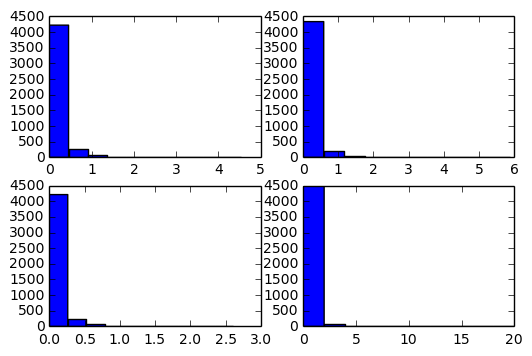

In [9]:
# plot some features
ax = pl.subplot(2,2,1)
h = pl.hist(X[:,0])
pl.subplot(2,2,2)
h = pl.hist(X[:,5])
pl.subplot(2,2,3)
h = pl.hist(X[:,10])
pl.subplot(2,2,4)
h = pl.hist(X[:,15])

## Exercise 3a

In [58]:
def classify(X, y, classifier, train_size=0.9):
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, train_size=train_size, random_state=0)
    classifier.fit(X_train,y_train)
    predictions = []
    for i in range(len(X_test)):
        predictions.append(classifier.predict(X_test[i].reshape(1, -1)))
    return accuracy_score(predictions, y_test.reshape(-1, 1))

In [60]:
print('test accuracy:', classify(X, y, svm.SVC()))

test accuracy: 0.822125813449


## Exercise 3b

In [4]:
def classify_k_fold(X, y, classifier, folds=10, **kwargs):
    return folds * [0.0,]

## Exercise 3c

In [39]:
split_scores = {}

In [40]:
split_scores['unshuffled'] = classify_k_fold(X, y, 
                                             svm.SVC(),
                                             shuffle=False)

In [41]:
split_scores['shuffled'] = classify_k_fold(X, y, 
                                           svm.SVC())

In [8]:
for k in sorted(split_scores):
    print('%s: %.3f' % (k, np.mean(split_scores[k])))

shuffled: 0.000
unshuffled: 0.000


## Exercise 3d

In [9]:
scaler_scores = {}

In [10]:
scaler_scores['unscaled'] = classify_k_fold(X, y, 
                                            svm.SVC())

In [11]:
scaler_scores['maxabs'] = classify_k_fold(X, y, 
                                          svm.SVC(), 
                                          scaler=preprocessing.MaxAbsScaler())

In [12]:
scaler_scores['standard'] = classify_k_fold(X, y, 
                                            svm.SVC(), 
                                            scaler=preprocessing.StandardScaler())

In [13]:
scaler_scores['robust'] = classify_k_fold(X, y, 
                                          svm.SVC(),
                                          scaler=preprocessing.RobustScaler())

In [14]:
for k in sorted(scaler_scores):
    print('%s: %.3f' % (k, np.mean(scaler_scores[k])))

maxabs: 0.000
robust: 0.000
standard: 0.000
unscaled: 0.000


## Exercise 3f

In [15]:
kernel_scores = {}
REPLACE_THIS = svm.SVC()

In [16]:
kernel_scores['linear'] = classify_k_fold(X, y, 
                                          REPLACE_THIS, 
                                          scaler=preprocessing.StandardScaler())

In [17]:
kernel_scores['poly-1'] = classify_k_fold(X, y, 
                                          REPLACE_THIS, 
                                          scaler=preprocessing.StandardScaler())

In [18]:
kernel_scores['poly-2'] = classify_k_fold(X, y, 
                                          REPLACE_THIS, 
                                          scaler=preprocessing.StandardScaler())

In [19]:
kernel_scores['poly-4'] = classify_k_fold(X, y, 
                                          REPLACE_THIS, 
                                          scaler=preprocessing.StandardScaler())

In [20]:
kernel_scores['rbf-0.001'] = classify_k_fold(X, y, 
                                             REPLACE_THIS, 
                                             scaler=preprocessing.StandardScaler())

In [21]:
kernel_scores['rbf-0.010'] = classify_k_fold(X, y, 
                                             REPLACE_THIS, 
                                             scaler=preprocessing.StandardScaler())

In [22]:
kernel_scores['rbf-0.100'] = classify_k_fold(X, y, 
                                             REPLACE_THIS, 
                                             scaler=preprocessing.StandardScaler())

In [23]:
kernel_scores['rbf-1.000'] = classify_k_fold(X, y, 
                                             REPLACE_THIS, 
                                             scaler=preprocessing.StandardScaler())

In [24]:
for k in sorted(kernel_scores):
    print('%s: %.3f' % (k, np.mean(kernel_scores[k])))

linear: 0.000
poly-1: 0.000
poly-2: 0.000
poly-4: 0.000
rbf-0.001: 0.000
rbf-0.010: 0.000
rbf-0.100: 0.000
rbf-1.000: 0.000


## Exercise 3e

In [25]:
classifier_scores = {}

In [26]:
classifier_scores['k-nearest-neigbor'] = classify_k_fold(X, y, 
                                           REPLACE_THIS, 
                                           scaler=preprocessing.StandardScaler())

In [27]:
classifier_scores['random-forest'] = classify_k_fold(X, y, 
                                       REPLACE_THIS, 
                                       scaler=preprocessing.StandardScaler())

In [28]:
classifier_scores['gradient-boost'] = classify_k_fold(X, y, 
                                   REPLACE_THIS, 
                                   scaler=preprocessing.StandardScaler())

In [29]:
classifier_scores['gaussian-naive-bayes'] = classify_k_fold(X, y, 
                                              REPLACE_THIS, 
                                              scaler=preprocessing.StandardScaler())

In [30]:
classifier_scores['linear-discriminant-analysis'] = classify_k_fold(X, y, 
                                                      REPLACE_THIS, 
                                                      scaler=preprocessing.StandardScaler())

In [31]:
classifier_scores['quadratic-discriminant-analysis'] = classify_k_fold(X, y, 
                                                         REPLACE_THIS, 
                                                         scaler=preprocessing.StandardScaler())

In [32]:
classifier_scores['support-vector-machine'] = classify_k_fold(X, y, 
                                                         REPLACE_THIS, 
                                                         scaler=preprocessing.StandardScaler())

In [33]:
for k in sorted(classifier_scores):
    print('%s: %.3f' % (k, np.mean(classifier_scores[k])))

ada-boost: 0.000
gaussian-naive-bayes: 0.000
k-nearest-neigbor: 0.000
linear-discriminant-analysis: 0.000
quadratic-discriminant-analysis: 0.000
random-forest: 0.000
support-vector-machine: 0.000
